In [1]:
setwd("C:/Users/Tirthankar/Documents/Spreadsheets")
data<-read.csv("repeated_rats.csv")
data.modified<-read.csv("repeated_rats_modified.csv")
print("datasets imported!")

[1] "datasets imported!"


In [3]:
options(warn=-1)
library(dplyr)
print("library imported!")

[1] "library imported!"


In [4]:
dim(data)
dim(data.modified)

[1] 30  6

[1] 150   2

In [5]:
head(data)

Rats,Treatment1,Treatment2,Treatment3,Treatment4,Treatment5
1,151,199,246,283,320
2,145,199,249,293,354
3,147,214,263,312,328
4,155,200,237,272,297
5,135,188,230,280,323
6,159,210,252,298,331


In [6]:
head(data.modified)

Treatments,weights
Treatment1,151
Treatment1,145
Treatment1,147
Treatment1,155
Treatment1,135
Treatment1,159


In [7]:
sum(is.na(data))
sum(is.na(data.modified))

[1] 0

[1] 0

as we can see, there are no missing values in our datasets

In [8]:
data$Rats=factor(data$Rats)     #since Rats are catagorical data
summary(data)

      Rats      Treatment1      Treatment2      Treatment3      Treatment4   
 1      : 1   Min.   :132.0   Min.   :180.0   Min.   :219.0   Min.   :258.0  
 2      : 1   1st Qu.:143.5   1st Qu.:190.2   1st Qu.:234.8   1st Qu.:280.0  
 3      : 1   Median :154.0   Median :202.0   Median :246.0   Median :286.0  
 4      : 1   Mean   :152.2   Mean   :201.8   Mean   :245.0   Mean   :289.2  
 5      : 1   3rd Qu.:159.0   3rd Qu.:209.5   3rd Qu.:252.8   3rd Qu.:297.8  
 6      : 1   Max.   :177.0   Max.   :236.0   Max.   :285.0   Max.   :340.0  
 (Other):24                                                                  
   Treatment5   
 Min.   :291.0  
 1st Qu.:314.5  
 Median :323.5  
 Mean   :324.8  
 3rd Qu.:333.8  
 Max.   :376.0  
                

In [9]:
levels(data$Rats)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"

In [10]:
data.modified$Treatments=factor(data.modified$Treatments)
summary(data.modified)

      Treatments    weights     
 Treatment1:30   Min.   :132.0  
 Treatment2:30   1st Qu.:190.2  
 Treatment3:30   Median :246.0  
 Treatment4:30   Mean   :242.6  
 Treatment5:30   3rd Qu.:295.8  
                 Max.   :376.0  

In [11]:
levels(data.modified$Treatments)

[1] "Treatment1" "Treatment2" "Treatment3" "Treatment4" "Treatment5"

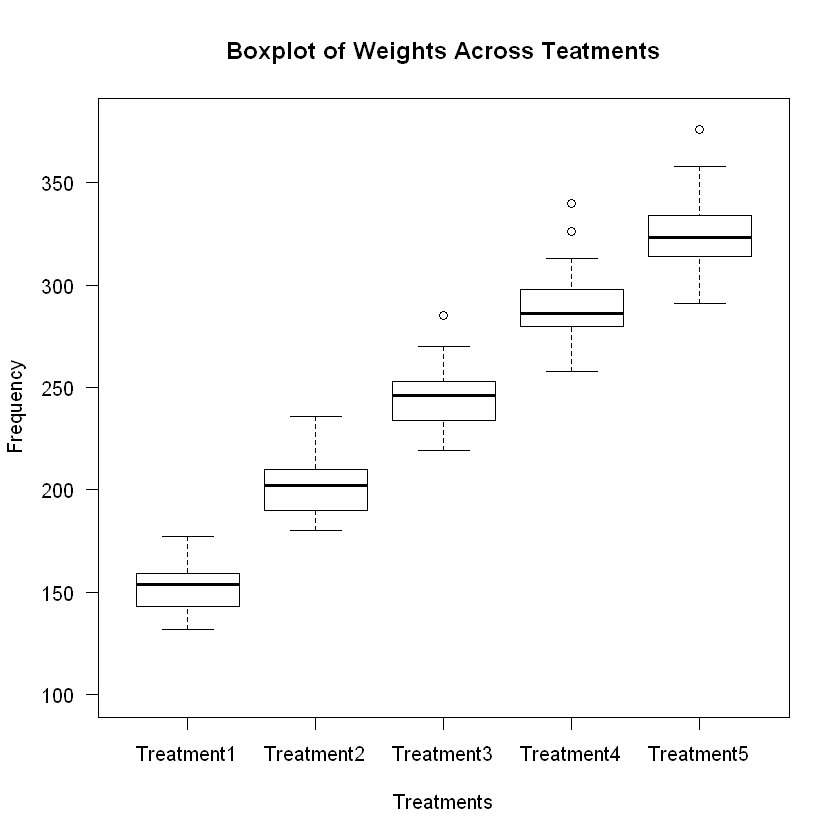

In [45]:
boxplot(data.modified$weights~data.modified$Treatments,main="Boxplot of Weights Across Teatments",xlab="Treatments",ylab="Frequency",ylim=c(100,380),las=1)

As we can see, our data do consist ouliiers. Now to drop them or not is entirely upon ourselves and
our model assumptions.

We can also see that weight measure due to natural reasons is cofounded with weight measure due to
treatment effects.

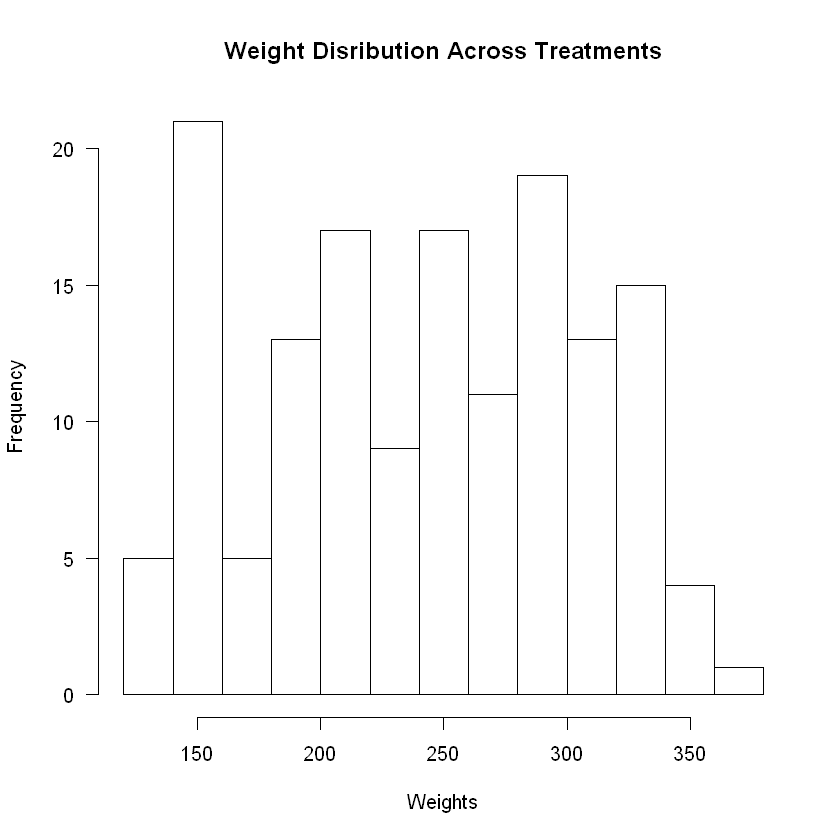

In [28]:
hist(data.modified$weights,main="Weight Disribution Across Treatments",xlab="Weights",las=1)

In [13]:
data_matrix<-rbind(data[,2:6])   
data_matrix

Treatment1,Treatment2,Treatment3,Treatment4,Treatment5
151,199,246,283,320
145,199,249,293,354
147,214,263,312,328
155,200,237,272,297
135,188,230,280,323
159,210,252,298,331
141,189,231,275,305
159,201,248,297,338
177,236,285,340,376
134,182,220,260,296


In [14]:
data_frame=t(data_matrix)   #taking transpose of the data matrix  
data_frame

Treatment1,151,145,147,155,135,159,141,159,177,134,...,154,139,146,157,132,160,169,157,137,153
Treatment2,199,199,214,200,188,210,189,201,236,182,...,205,190,191,211,185,207,216,205,180,200
Treatment3,246,249,263,237,230,252,231,248,285,220,...,253,225,229,250,237,257,261,248,219,244
Treatment4,283,293,312,272,280,298,275,297,340,260,...,298,267,272,285,286,303,295,289,258,286
Treatment5,320,354,328,297,323,331,305,338,376,296,...,334,302,302,323,331,345,333,316,291,324


In [37]:
#fitting y_ij=mu+alpha_i+epshilon_ij
weights.model<-lm(weights~Treatments,data=data.modified)
weights.model


Call:
lm(formula = weights ~ Treatments, data = data.modified)

Coefficients:
         (Intercept)  TreatmentsTreatment2  TreatmentsTreatment3  
              152.17                 49.60                 92.87  
TreatmentsTreatment4  TreatmentsTreatment5  
              137.00                172.63  


Treatment 1 taken as bechmark and hence dropped to accquire consisent solutions and
linearly independant model marix

In [34]:
#to get the additional effect due to treatment 1
weights.model.new<-lm(weights~Treatments-1,data=data.modified)
weights.model.new


Call:
lm(formula = weights ~ Treatments - 1, data = data.modified)

Coefficients:
TreatmentsTreatment1  TreatmentsTreatment2  TreatmentsTreatment3  
               152.2                 201.8                 245.0  
TreatmentsTreatment4  TreatmentsTreatment5  
               289.2                 324.8  


In [8]:
summary(weights.model)


Call:
lm(formula = weights ~ Treatments, data = data.modified)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.800 -10.617  -0.467   7.833  51.200 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           152.167      2.862   53.17   <2e-16 ***
TreatmentsTreatment2   49.600      4.048   12.25   <2e-16 ***
TreatmentsTreatment3   92.867      4.048   22.94   <2e-16 ***
TreatmentsTreatment4  137.000      4.048   33.85   <2e-16 ***
TreatmentsTreatment5  172.633      4.048   42.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.68 on 145 degrees of freedom
Multiple R-squared:  0.9405,	Adjusted R-squared:  0.9389 
F-statistic:   573 on 4 and 145 DF,  p-value: < 2.2e-16


In [35]:
summary(weights.model.new)


Call:
lm(formula = weights ~ Treatments - 1, data = data.modified)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.800 -10.617  -0.467   7.833  51.200 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
TreatmentsTreatment1  152.167      2.862   53.17   <2e-16 ***
TreatmentsTreatment2  201.767      2.862   70.50   <2e-16 ***
TreatmentsTreatment3  245.033      2.862   85.61   <2e-16 ***
TreatmentsTreatment4  289.167      2.862  101.03   <2e-16 ***
TreatmentsTreatment5  324.800      2.862  113.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.68 on 145 degrees of freedom
Multiple R-squared:  0.9962,	Adjusted R-squared:  0.9961 
F-statistic:  7642 on 5 and 145 DF,  p-value: < 2.2e-16


In [39]:
anova(weights.model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Treatments,4,563302.91,140825.727,573.0492,9.764113e-88
Residuals,145,35633.47,245.748,NA,NA


In [40]:
anova(weights.model.new)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Treatments,5,9390546.53,1878109.307,7642.418,1.111571e-173
Residuals,145,35633.47,245.748,NA,NA


as we can see, Treatment 5 has the best additional effect over others. 
and our much much small p-value tells us that treatment means do differ & a F statistics of
numerical value 573.05 do confirm our assumption.  

we must also keep in mind that this analysis is solely based on our assumptions that there are no
condfounding  effects. If we do need to cosider the conunding effect, we nee to redo the experiment
and design it accordingly.